# Data Wrangling

In [1]:
# Import required package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Assign url of file: url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

# Read in all sheets of Excel file and load into xl 
# we skipped the first row because the data had two rows with column labels
xl = pd.read_excel(url, sheet_name=None, skiprows = [0])

In [3]:
#convert the xl OrderedDict to a pandas dataframe
df = pd.DataFrame(xl['Data'])

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
#check the dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#create a new list of column label to rename the columns of dataframe
new_columns = ['id','limit_balance', 'gender', 'education','marital_status', 'age','status_september','status_august','status_july','status_june','status_may','status_april','balance_september','balance_august','balance_july','balance_june','balance_may','balance_april','paid_september','paid_august','paid_july','paid_june','paid_may','paid_april','default_payment']
#change the column labels
df.columns = new_columns

In [7]:
#to check the column labels
df.head()

,id,limit_balance,gender,education,marital_status,age,status_september,status_august,status_july,status_june,...,balance_june,balance_may,balance_april,paid_september,paid_august,paid_july,paid_june,paid_may,paid_april,default_payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#to get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                   30000 non-null int64
limit_balance        30000 non-null int64
gender               30000 non-null int64
education            30000 non-null int64
marital_status       30000 non-null int64
age                  30000 non-null int64
status_september     30000 non-null int64
status_august        30000 non-null int64
status_july          30000 non-null int64
status_june          30000 non-null int64
status_may           30000 non-null int64
status_april         30000 non-null int64
balance_september    30000 non-null int64
balance_august       30000 non-null int64
balance_july         30000 non-null int64
balance_june         30000 non-null int64
balance_may          30000 non-null int64
balance_april        30000 non-null int64
paid_september       30000 non-null int64
paid_august          30000 non-null int64
paid_july            30000 non-null int64
paid_june

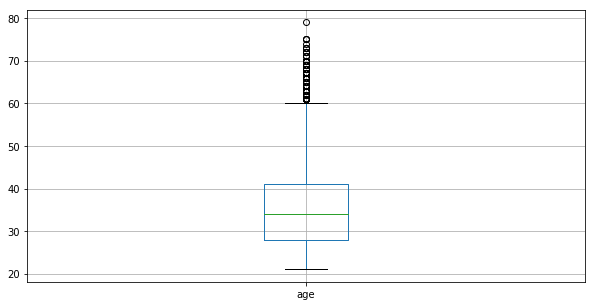

In [9]:
#Using the boxplot to check for outliers
df.boxplot('age',figsize=(10,5))

In [10]:
#Create a list of column labels for different months for balance amount and paid amount
balance = ['balance_september','balance_august','balance_july','balance_june','balance_may','balance_april']
paid = ['paid_september','paid_august','paid_july','paid_june','paid_may','paid_april']

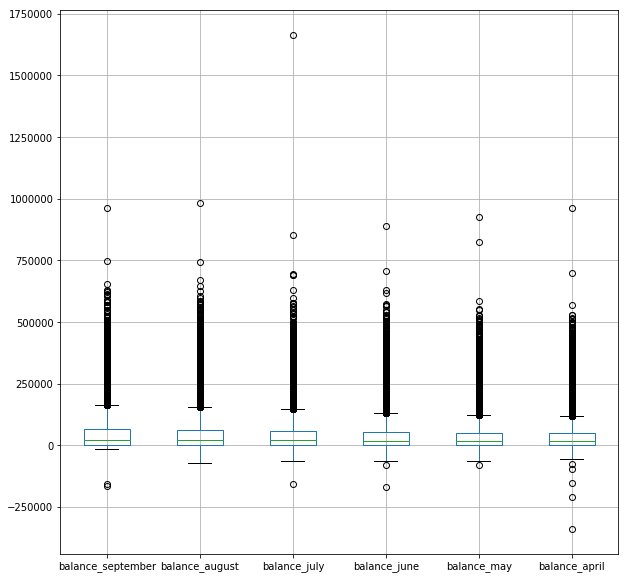

In [11]:
#we can use boxplot to check for outliers from balance columns for each month
df.boxplot(balance, figsize=(10,10))

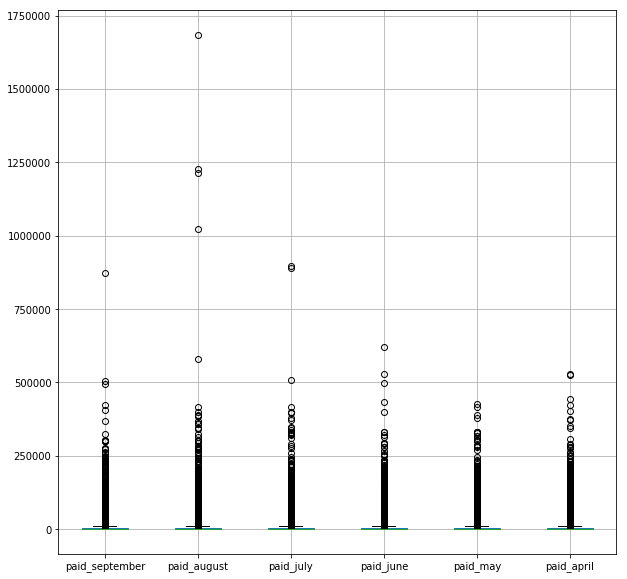

In [12]:
#Draw boxplot to detect outliers from paid column for each month
df.boxplot(paid, figsize=(10,10))

In [13]:
#find min, max, median, 1st and 3rd quartile values for balance column of each month 
df[balance].describe()

,balance_september,balance_august,balance_july,balance_june,balance_may,balance_april
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [14]:
#find min, max, median, 1st and 3rd quartile values for paid column of each month
df[paid].describe()

,paid_september,paid_august,paid_july,paid_june,paid_may,paid_april
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# Create a new DataFrame removing bad data and removing outliers

In [15]:
new_df1 = df.copy()

In [16]:
#check if there are any bad data for education feature
new_df1[(new_df1['education']>4)|(new_df1['education']<1)]['education'].count()

345

In [17]:
#drop/delete the record with the bad data
new_df1 = new_df1.drop(new_df1[(new_df1['education']>4)|(new_df1['education']<1)].index)

In [18]:
#check to see for bad data
new_df1[(new_df1['education']>4)|(new_df1['education']<1)]['education'].count()

0

In [19]:
#to check if there is any bad data in the marital_status column
new_df1[(new_df1['marital_status']<1)|(new_df1['marital_status']>3)]['marital_status'].count()

54

In [20]:
#drop/delete the record with bad data 
new_df1 = new_df1.drop(new_df1[(new_df1['marital_status']<1)|(new_df1['marital_status']>3)].index)

In [21]:
#to check if there is any bad data in the marital_status column
new_df1[(new_df1['marital_status']<1)|(new_df1['marital_status']>3)]['marital_status'].count()

0

In [22]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 25 columns):
id                   29601 non-null int64
limit_balance        29601 non-null int64
gender               29601 non-null int64
education            29601 non-null int64
marital_status       29601 non-null int64
age                  29601 non-null int64
status_september     29601 non-null int64
status_august        29601 non-null int64
status_july          29601 non-null int64
status_june          29601 non-null int64
status_may           29601 non-null int64
status_april         29601 non-null int64
balance_september    29601 non-null int64
balance_august       29601 non-null int64
balance_july         29601 non-null int64
balance_june         29601 non-null int64
balance_may          29601 non-null int64
balance_april        29601 non-null int64
paid_september       29601 non-null int64
paid_august          29601 non-null int64
paid_july            29601 non-null int64
paid_june

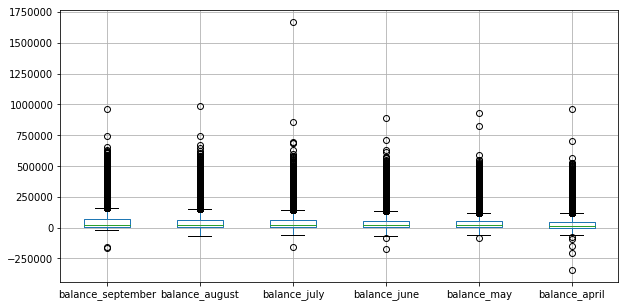

In [23]:
#to check the updated value using boxplot
new_df1.boxplot(balance,figsize=(10,5))

In [24]:
#this for loop will locate the outliers from the dataframe and drop them
#iterate over the list named balance, which has the balance column labels
for month in balance:
    #calculate 3rd quartile
    q3 = new_df1[month].quantile(0.75)
    #calculate 1st quartile
    q1 = new_df1[month].quantile(0.25)
    #calculate interquartile range
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    lower_index = new_df1[new_df1[month]<=lower].index
    upper_index = new_df1[new_df1[month]>=upper].index
    new_df1 = new_df1.drop(lower_index)
    new_df1 = new_df1.drop(upper_index)

In [25]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22748 entries, 0 to 29999
Data columns (total 25 columns):
id                   22748 non-null int64
limit_balance        22748 non-null int64
gender               22748 non-null int64
education            22748 non-null int64
marital_status       22748 non-null int64
age                  22748 non-null int64
status_september     22748 non-null int64
status_august        22748 non-null int64
status_july          22748 non-null int64
status_june          22748 non-null int64
status_may           22748 non-null int64
status_april         22748 non-null int64
balance_september    22748 non-null int64
balance_august       22748 non-null int64
balance_july         22748 non-null int64
balance_june         22748 non-null int64
balance_may          22748 non-null int64
balance_april        22748 non-null int64
paid_september       22748 non-null int64
paid_august          22748 non-null int64
paid_july            22748 non-null int64
paid_june

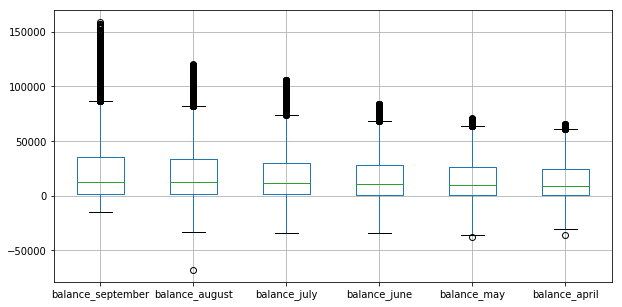

In [26]:
#to check the updated value using boxplot
new_df1.boxplot(balance,figsize=(10,5))

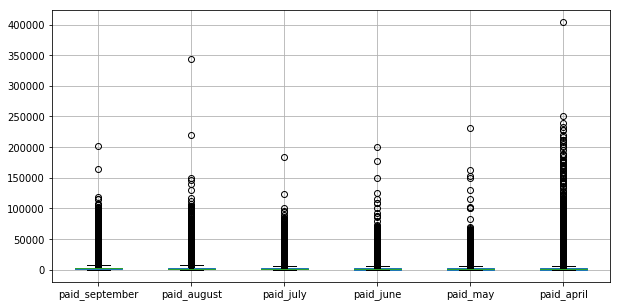

In [27]:
#to check the updated value using boxplot
new_df1.boxplot(paid,figsize=(10,5))

In [28]:
#this for loop will locate the outliers from the dataframe and drop 
#iterate over the list named paid, which has the paid column labels
for month in paid:
    #calculate 3rd quartile
    q3 = new_df1[month].quantile(0.75)
    #calculate 1st quartile
    q1 = new_df1[month].quantile(0.25)
    #calculate interquartile range
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    lower_index = new_df1[new_df1[month]<=lower].index
    upper_index = new_df1[new_df1[month]>=upper].index
    new_df1 = new_df1.drop(lower_index)
    new_df1 = new_df1.drop(upper_index)

In [29]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14357 entries, 0 to 29999
Data columns (total 25 columns):
id                   14357 non-null int64
limit_balance        14357 non-null int64
gender               14357 non-null int64
education            14357 non-null int64
marital_status       14357 non-null int64
age                  14357 non-null int64
status_september     14357 non-null int64
status_august        14357 non-null int64
status_july          14357 non-null int64
status_june          14357 non-null int64
status_may           14357 non-null int64
status_april         14357 non-null int64
balance_september    14357 non-null int64
balance_august       14357 non-null int64
balance_july         14357 non-null int64
balance_june         14357 non-null int64
balance_may          14357 non-null int64
balance_april        14357 non-null int64
paid_september       14357 non-null int64
paid_august          14357 non-null int64
paid_july            14357 non-null int64
paid_june

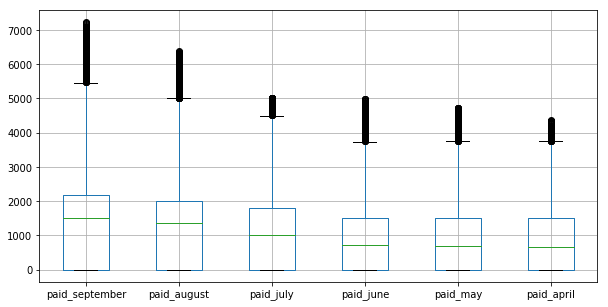

In [30]:
#to check the updated value using boxplot
new_df1.boxplot(paid,figsize=(10,5))

# Data Story

In [31]:
#to find out total number of 1 default and 0 non-default 
new_df1['default_payment'].value_counts()

0    10315
1     4042
Name: default_payment, dtype: int64

In [32]:
#to calculate the percentage of 1 default and 0 non-default
default_rate = new_df1['default_payment'].value_counts() * 100 / len(new_df1)
default_rate

0    71.846486
1    28.153514
Name: default_payment, dtype: float64

# After we wrangled and cleaned the dataset, we started to explore the data in detail. The first step was to see the count and distributions of different variables from the dataset.

# ● How many cardholders are defaulters?
We found that about 72% of the cardholders(10,315) did not default and about 28% of the cardholders (4,042) default.

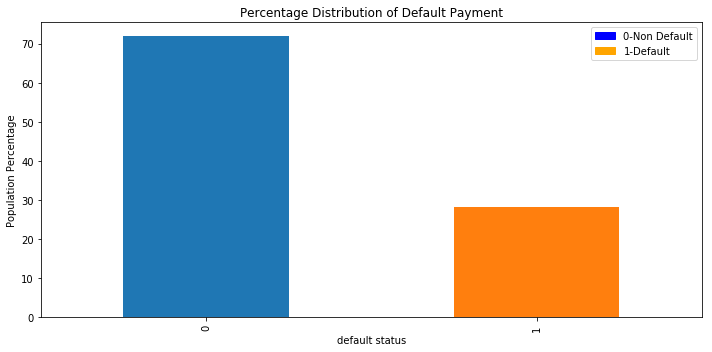

In [33]:
#draw a bar plot to visualize the default payment
import matplotlib.patches as mpatches
default_rate.plot(kind='bar',title='Percentage Distribution of Default Payment',figsize=(10,5))
ND = mpatches.Patch(color ='blue', label = '0-Non Default')
DT = mpatches.Patch(color ='orange', label = '1-Default')
plt.legend(handles=[ND, DT], loc=0)
plt.xlabel('default status')
plt.ylabel('Population Percentage')
plt.tight_layout()
plt.savefig('1Default_Payment_distribution.jpg')

In [34]:
#to find out total number of 1 male and 2 female
#there is more 2 female 
new_df1['gender'].value_counts()

2    8500
1    5857
Name: gender, dtype: int64

In [35]:
#calculate the gender distribution
gender_rate = new_df1['gender'].value_counts() * 100 / len(new_df1)
gender_rate

2    59.204569
1    40.795431
Name: gender, dtype: float64

# ● How are the cardholders divided by gender? 
We have 60% female and 40% male clients.

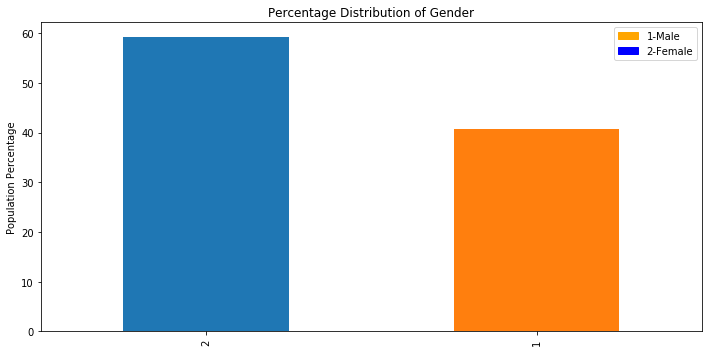

In [36]:
#to calculate the percentage and count of gender
#draw a bar plot to see the total number of 1 male and 2 female card holder
gender_rate.plot(kind='bar',title='Percentage Distribution of Gender',figsize=(10,5))
ML = mpatches.Patch(color ='orange', label = '1-Male')
FM = mpatches.Patch(color ='blue', label = '2-Female')
plt.legend(handles=[ML, FM], loc=0)
plt.ylabel('Population Percentage')
plt.tight_layout()
plt.savefig('1gender_distribution1.jpg')

In [37]:
#to find out the total number of cardholder with different education level
#2 University level is high, and 4 others is low
new_df1['education'].value_counts()

2    7168
1    4409
3    2732
4      48
Name: education, dtype: int64

In [38]:
#to calculate the percentage education distribution
education_rate = new_df1['education'].value_counts() * 100 / len(new_df1)
education_rate

2    49.926865
1    30.709758
3    19.029045
4     0.334332
Name: education, dtype: float64

# ● What are the education level, and Which education level does the most of the cardholders belong to? 
Most of our cardholder have University level education for their highest level of education. We have 30% with Graduate level education, 49% with University level, 19% with High School level, and 0.33% with Others as level of education.

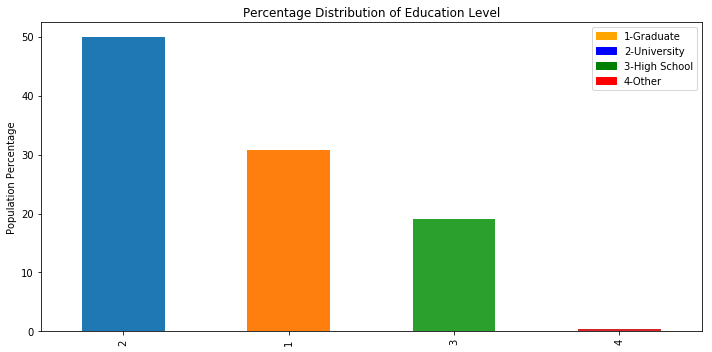

In [39]:
#draw a bar plot to see what education level most of the card holder have
#University level  is the highest
education_rate.plot(kind='bar',title='Percentage Distribution of Education Level',figsize=(10,5))
GD = mpatches.Patch(color ='Orange', label = '1-Graduate')
UN = mpatches.Patch(color ='blue', label = '2-University')
HS = mpatches.Patch(color ='green', label = '3-High School')
OT = mpatches.Patch(color ='red', label = '4-Other')
plt.legend(handles=[GD, UN, HS, OT], loc=0)
plt.ylabel('Population Percentage')
plt.tight_layout()
plt.savefig('1education_distribution1.jpg')

In [40]:
#to find out the count of different martial status,1 married, 2 single, 3 others from the dataset 
#2 i.e single is highest
new_df1['marital_status'].value_counts()

2    7685
1    6481
3     191
Name: marital_status, dtype: int64

In [41]:
#to calculate the percentage education distribution
marital_status_rate = new_df1['marital_status'].value_counts() * 100 / len(new_df1)
marital_status_rate

2    53.527896
1    45.141743
3     1.330361
Name: marital_status, dtype: float64

# ● How many cardholders are married and how many are single?
We have 53% married, 45% single, and rest as others.

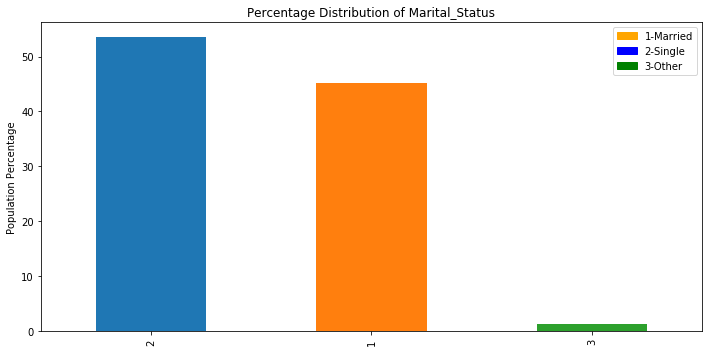

In [42]:
#draw a bar plot to see the population of married, single, and others
#single is highest, married is second and others is lowest
marital_status_rate.plot(kind='bar', title='Percentage Distribution of Marital_Status',figsize=(10,5))
MR = mpatches.Patch(color ='orange', label = '1-Married')
SG = mpatches.Patch(color ='blue', label = '2-Single')
O = mpatches.Patch(color ='green', label = '3-Other')
plt.legend(handles=[MR, SG, O], loc=0)
plt.ylabel('Population Percentage')
plt.tight_layout()
plt.savefig('1marital_status_distribution1.jpg')

# ● What age group is the majority of the cardholders?
Most of our carholders are of age group 20 to 40. This exploration can provide us with the demographic of different variables.

C:\Users\lakpa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


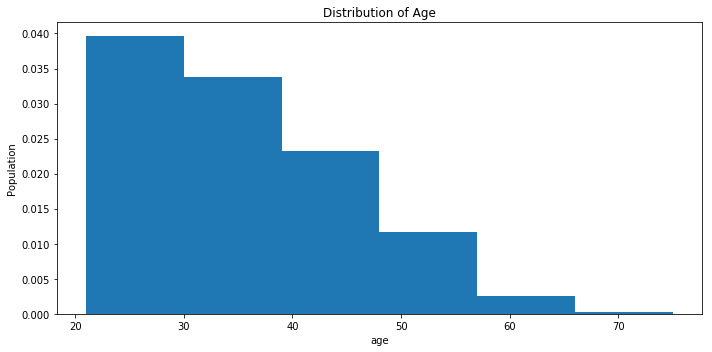

In [43]:
#we can also draw a histogram to see our age group in the dataset
new_df1['age'].hist(bins=6,figsize=(10,5),normed=1,grid=False)
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('Population')
plt.tight_layout()
plt.savefig('1age_histogram1.jpg')

In [44]:
#group the data by gender and find out the how many clients default
total_defaults = np.sum(new_df1['default_payment']==1)
group_gender = new_df1.groupby('gender')['default_payment'].sum().reset_index(name='default')
group_gender

,gender,default
0,1,1742
1,2,2300


# The main focus of this project is to create different Machine Learning Models to predict default, so let's find out some insights using different data visualization. We drew barplots to compare different variables with the default cardholders. From each plot, we learned which features or variable effects default. When we compared different features with default, we found that the gender, age, education, and marital status has effect on cardholders default.

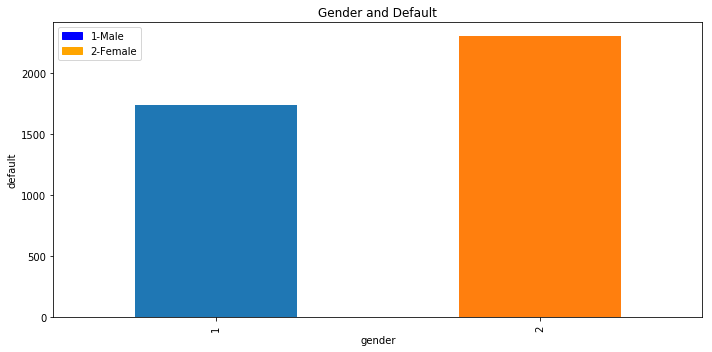

In [45]:
#Now we will commpare default rate with Gender
group_gender.plot(kind='bar',x='gender', y='default',title='Gender and Default',figsize=(10,5))
ML = mpatches.Patch(color ='blue', label = '1-Male')
FM = mpatches.Patch(color ='orange', label = '2-Female')
plt.legend(handles=[ML, FM], loc=0)
plt.ylabel('default')
plt.tight_layout()
plt.savefig('1gender_default_bar1.jpg')

In [46]:
group_education = new_df1.groupby(['education'])['default_payment'].sum().reset_index(name='default')
group_education

,education,default
0,1,1128
1,2,2086
2,3,824
3,4,4


# We found that University level cardholders default more than other education level.

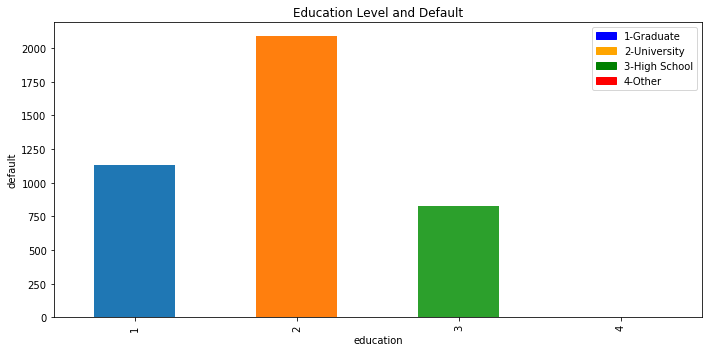

In [47]:
#Now we will commpare default with education level
group_education.plot(kind='bar',x='education',y='default',figsize=(10,5),title='Education Level and Default')
G = mpatches.Patch(color ='blue', label = '1-Graduate')
U = mpatches.Patch(color ='orange', label = '2-University')
H = mpatches.Patch(color ='green', label = '3-High School')
OT = mpatches.Patch(color ='red', label = '4-Other')
plt.legend(handles=[G, U, H, OT], loc=0)
plt.ylabel('default')
plt.tight_layout()
plt.savefig('1education_default.jpg')

In [48]:
#group the data by marital_status to see who has maximum default
group_marital = new_df1.groupby(['marital_status'])['default_payment'].sum().reset_index(name='default')
group_marital

,marital_status,default
0,1,1923
1,2,2058
2,3,61


# From marital_status with default, we found that both married and single have very close number of default, and others have a very low default.

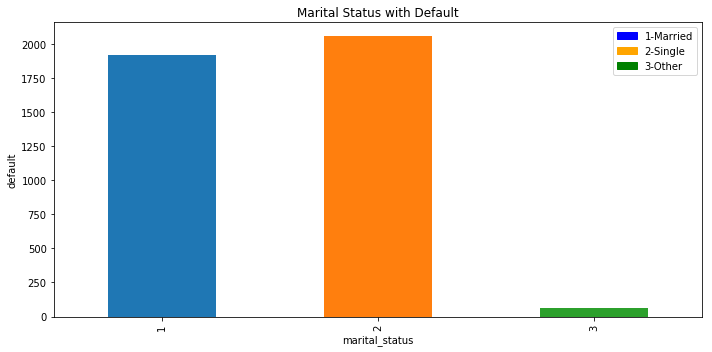

In [49]:
#Now we will commpare default with all marital status
#it shows that others is the lowest to default
#married and single both are high in number to default
group_marital.plot(kind='bar',x='marital_status',y='default',title='Marital Status with Default',figsize=(10,5))
MR = mpatches.Patch(color ='blue', label = '1-Married')
SG = mpatches.Patch(color ='orange', label = '2-Single')
O = mpatches.Patch(color ='green', label = '3-Other')
plt.legend(handles=[MR, SG, O], loc=0)
plt.ylabel('default')
plt.tight_layout()
plt.savefig('1marital_status_default.jpg')

In [50]:
#to work with age group, create a list of age group to use as a bins
#create a new column with column label 'age_bin'
bins = [20,30,40,50,60,70,80]
new_df1['age_bin']= pd.cut(new_df1['age'], bins)

In [51]:
#find out the population of different age group
#age group 20 to 30 is the highest, and 30-40 is the second highest
new_df1['age_bin'].value_counts()

(20, 30]    5695
(30, 40]    4587
(40, 50]    2842
(50, 60]    1093
(60, 70]     137
(70, 80]       3
Name: age_bin, dtype: int64

In [52]:
#Find the percentage of different age_group
agegroup_population = new_df1['age_bin'].value_counts() * 100 / len(new_df1)
agegroup_population

(20, 30]    39.667061
(30, 40]    31.949572
(40, 50]    19.795222
(50, 60]     7.613011
(60, 70]     0.954238
(70, 80]     0.020896
Name: age_bin, dtype: float64

In [53]:
#now group the data by age_bin
group_age = new_df1.groupby('age_bin')['default_payment'].sum().reset_index(name='default')
group_age

,age_bin,default
0,"(20, 30]",1597
1,"(30, 40]",1240
2,"(40, 50]",824
3,"(50, 60]",330
4,"(60, 70]",48
5,"(70, 80]",3


# Age group with default shows that age group 20 to 30 default more than any other age-group.

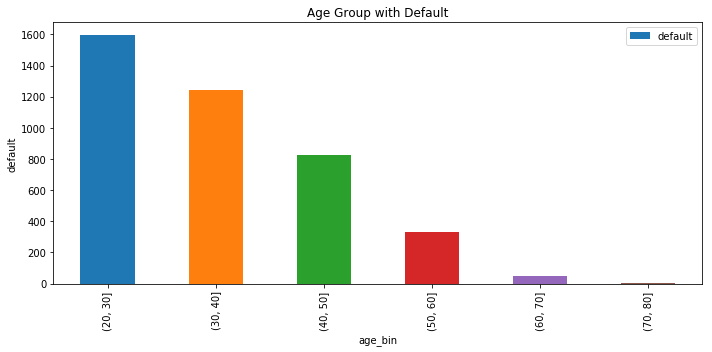

In [54]:
#Now,default_payment with age groups
#more number of age-group(20-30) clients default
group_age.plot(kind='bar',x='age_bin',y='default',title='Age Group with Default',figsize=(10,5))
plt.ylabel('default')
plt.tight_layout()
plt.savefig('1age_group_default.jpg')

# We found that some cardholders have negative balance. This means that some cardholders are paying the bank more than their balance or some transaction of purchase may have been refunded to the credit card.

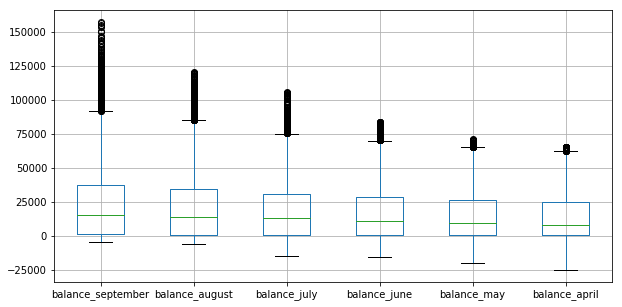

In [55]:
#to check the updated value using boxplot
new_df1.boxplot(balance,figsize=(10,5))
plt.savefig('1balance_box.jpg')

# When we compared balance column with paid column for the month of september, we saw that there is a positive linear relationship between the balance and paid columns except for some balances. Looking at the plot, those balances may be paid by automatic payment every month.

C:\Users\lakpa\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


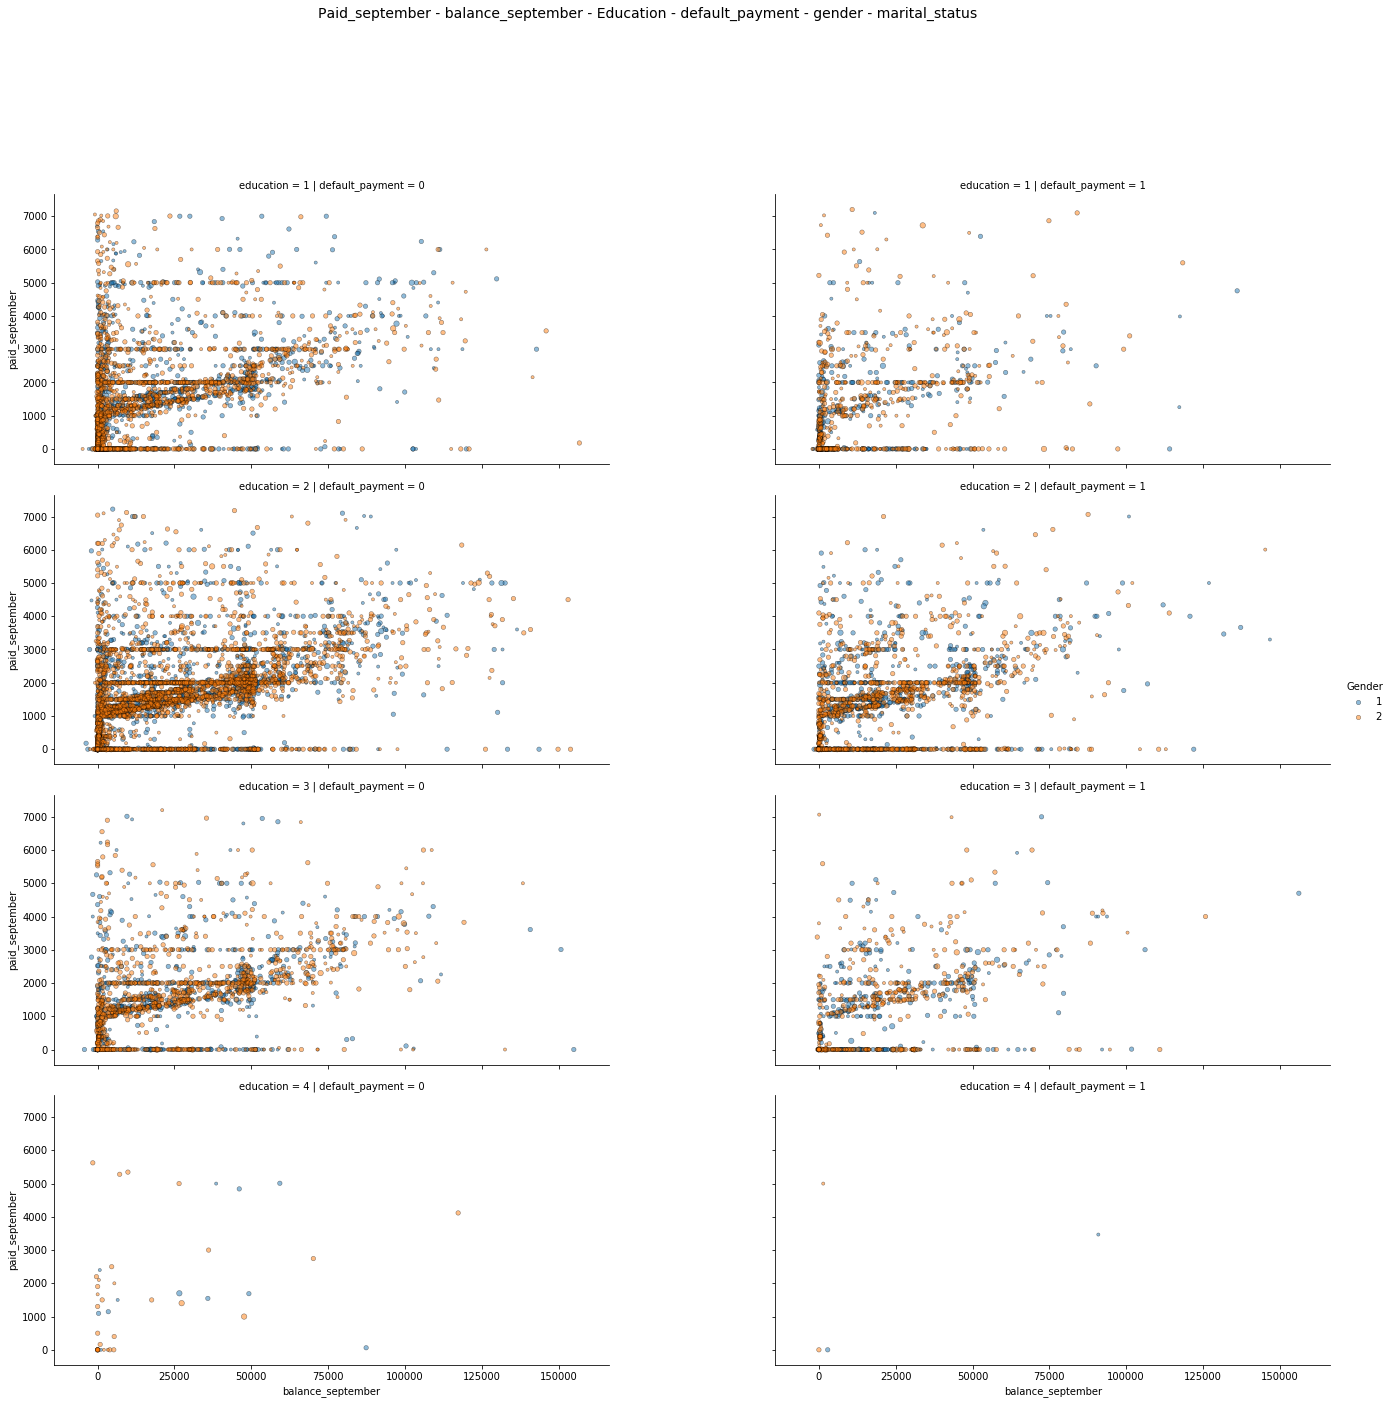

In [56]:
g = sns.FacetGrid(new_df1, row='education', col="default_payment", hue='gender', size=4)
g.map(plt.scatter,  "balance_september", "paid_september", alpha=0.5, edgecolor='k', linewidth=0.5, s=new_df1['marital_status']*10)
fig = g.fig 
fig.set_size_inches(20, 20)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Paid_september - balance_september - Education - default_payment - gender - marital_status', fontsize=14)
l = g.add_legend(title='Gender')
plt.savefig('1paid_balance_scatter.jpg')

In [57]:
#group the data by marital_status and gender to see who has maximum default
group_marital_gender = new_df1.groupby(['marital_status','gender'])['default_payment'].sum().reset_index(name='default')
group_marital_gender

,marital_status,gender,default
0,1,1,787
1,1,2,1136
2,2,1,930
3,2,2,1128
4,3,1,25
5,3,2,36


# From the analysis and visualizing the dataset, we found that the maximum number of defaulter are female, with University level education, and between age 20-30. 

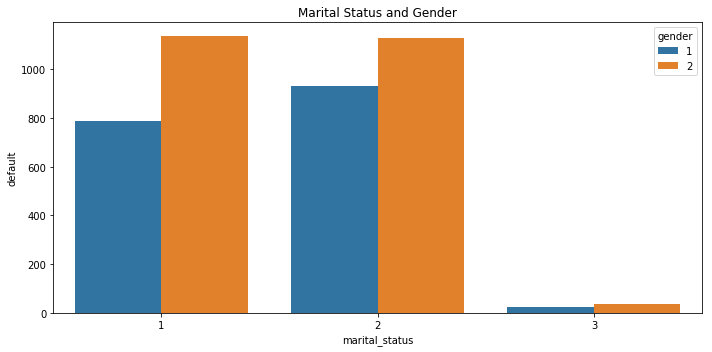

In [58]:
plt.figure(figsize=(10,5))
#draw a barplot to check if female has the higher default rate
sns.barplot(x='marital_status',y='default',hue='gender',data=group_marital_gender)
plt.title('Marital Status and Gender')
plt.tight_layout()
plt.savefig('1marital_gender_default.jpg')

In [59]:
#now group the data by age_bin and gender
group_age_gender = new_df1.groupby(['age_bin','gender'])['default_payment'].sum().reset_index(name='default')
group_age_gender

,age_bin,gender,default
0,"(20, 30]",1,627
1,"(20, 30]",2,970
2,"(30, 40]",1,555
3,"(30, 40]",2,685
4,"(40, 50]",1,374
5,"(40, 50]",2,450
6,"(50, 60]",1,160
7,"(50, 60]",2,170
8,"(60, 70]",1,24
9,"(60, 70]",2,24


# When we compared male and female for each age group with default, we saw that female of age group 20-30 are the most default.

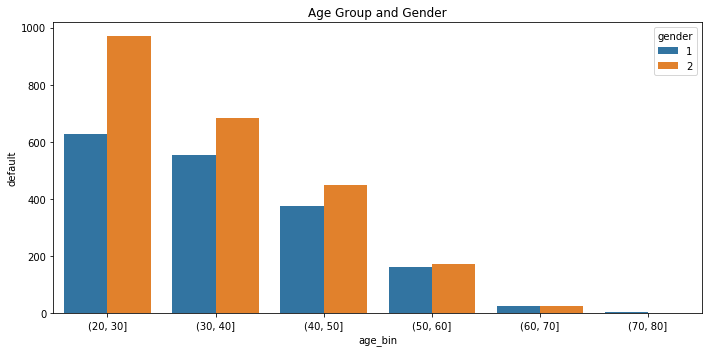

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x='age_bin',y='default',hue='gender',data=group_age_gender)
plt.title('Age Group and Gender')
plt.tight_layout()
plt.savefig('1age_group_gender_default.jpg')

In [61]:
group_gender_education = new_df1.groupby(['gender','education'])['default_payment'].sum().reset_index(name='default')
group_gender_education.set_index(['gender','education'],inplace=True)
group_gender_education.sort_values('default',ascending=False).head(3)

,,default
gender,education,
2,2,1197
1,2,889
2,1,655


# When we group gender and education column, we see that 2,2 or Female with University level education default more than other group clients.

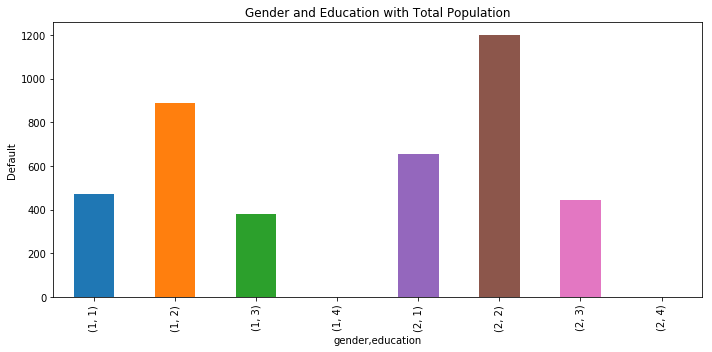

In [62]:
group_gender_education['default'].plot(kind='bar',title='Gender and Education with Total Population',figsize=(10,5))
plt.ylabel('Default')
plt.tight_layout()
plt.savefig('1gender_education_default.jpg')

In [63]:
group_gender_education_marital = new_df1.groupby(['gender','education','marital_status'])['default_payment'].sum().reset_index(name='default')
group_gender_education_marital.set_index(['gender','education','marital_status'],inplace=True)
group_gender_education_marital.sort_values('default',ascending=False).head(3)

default
gender education marital_status         
2      2         1                   633
                 2                   544
1      2         2                   483

# When we compared gender, education and marital status with default, we found that group female, university level, and married cardholder had maximum default.

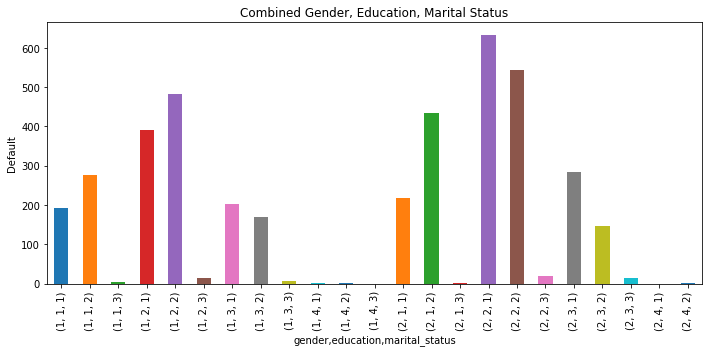

In [64]:
group_gender_education_marital['default'].plot(kind='bar',title='Combined Gender, Education, Marital Status',figsize=(10,5))
plt.ylabel('Default')
plt.tight_layout()
plt.savefig('1gender_education_marital_default.jpg')

# Inferential statistics

In [65]:
# Create two dataframes: m for male and f for female 
m = new_df1[new_df1.gender==1]
f = new_df1[new_df1.gender==2]

In [66]:
#t-statistics
#H0: p(m.default_payment) = p(pop_f.default_payment)
#Ha: p(m.default_payment) != p(pop_f.default_payment)

# calculate the sample mean of male and female sample default_payment
sample_p_m = np.mean(m.default_payment)
sample_p_f = np.mean(f.default_payment)
# calculate the difference of sample mean of male and female
diff_p = sample_p_m - sample_p_f
# calculate the size of sample male and female
n_m = len(m.default_payment)
n_f = len(f.default_payment)
# calculate the variance of male and female
variance_m = np.var(m.default_payment)
variance_f = np.var(f.default_payment)
#Calculate the t-value
t= diff_p / np.sqrt((variance_m/n_m)+(variance_f/n_f))
t

3.496486853450712

In [67]:
#calculate the degree of freedom
dof = n_m + n_f -2
dof

14355

In [68]:
# We assume equal population variance
standard_error = np.sqrt(((n_m-1)*variance_m + (n_f-1)*variance_f) / (n_m+n_f-2))*(np.sqrt((1/n_m)+(1/n_f)))
#the critical t-value is 1.960 for degree of freedom 29998 and alpha 0.05
margin_of_error = 1.96* standard_error
margin_of_error

0.014963148214569085

In [69]:
#Calculate the confidence interval for 95%
conf_int = [diff_p - margin_of_error, diff_p + margin_of_error]
conf_int

[0.011870504830053233, 0.041796801259191406]

In [70]:
from scipy import stats

#calculation p-value for 2-tailed test. 
p_value = stats.t.sf(t, dof)*2
print('p-value is ',p_value)

p-value is  0.00047285207846291374


The p-value is less than level of significance 0.05, so we reject the null hypothesis. 

In [71]:
# Now, use the bootstrap method
#Bootstrap replicate function to resample data and find mean/std
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#draw many bootstrap replicates 
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

mean_diff = np.mean(m.default_payment) - np.mean(f.default_payment)
#get bootstrap replicates of data sets
bs_replicates_m = draw_bs_reps(m.default_payment, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(f.default_payment, np.mean, size=10000)
#compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_m - bs_replicates_f
conf_interval = np.percentile(bs_diff_replicates, [2.5, 97.5])
conf_interval

array([0.01190933, 0.04182253])

In [72]:
# To find the p-value
combined_mean = np.mean(new_df1.default_payment)
#shift the samples
m_shifted = m.default_payment - np.mean(m.default_payment) + combined_mean
f_shifted = f.default_payment - np.mean(f.default_payment) + combined_mean
#get bootstrap replicates of shifted data sets
bs_replicates_m = draw_bs_reps(m_shifted, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(f_shifted, np.mean, size=10000)
#compute replicates of difference of means:
bs_diff_replicates = bs_replicates_m - bs_replicates_f
#compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
p

0.0005

'''P-value is less than 0.05, we will reject the null hypothesis. The gender is one important factor for default payment.

# Chi-squared Test

# For: Gender

H0: Gender and default_payment are independent.

Ha: Gender and default_payment are dependent.  

alpha = 0.05

df = (rows-1)*(columns-1)
df = (2-1) * (2-1)
df = 1

critical chi squared value = 3.84146

In [73]:
chi_squared_test = new_df1.groupby(['default_payment','gender']).count()['id'].unstack()
chi_squared_test

gender,1,2
default_payment,,
0,4115,6200
1,1742,2300


In [74]:
from scipy.stats import chisquare

In [75]:
from scipy import stats

In [76]:
observed = [[4115, 6200], [1742, 2300]]
chi2, p, dof, expected = stats.chi2_contingency(observed)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 12.211582107313696
DF: 1
p-value: 0.00047493740796023345
[[4208.04868705 6106.95131295]
 [1648.95131295 2393.04868705]]


The chi squared statistics is 12.21
P-value is <0.001
The result is significant at p<0.05
We reject the null hypothesis and suggest the alternative hypothesis.
The default_payment is dependent on gender.

# For Education:

H0: Education and default_payment are not related.

Ha: Education and default_payment are related. 

In [77]:
chi_squared_test_education = new_df1.groupby(['default_payment','education']).count()['id'].unstack()
chi_squared_test_education

education,1,2,3,4
default_payment,,,,
0,3281,5082,1908,44
1,1128,2086,824,4


In [78]:
obs = [[3281,5082,1908,44],[1128,2086,824,4]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 32.341755992350016
DF: 3
p-value: 4.4335674168815514e-07
[[3167.71156927 5149.95611897 1962.84599847   34.4863133 ]
 [1241.28843073 2018.04388103  769.15400153   13.5136867 ]]


The chi squared test p-value is < 0.001
The result is significant at p < 0.05
We reject the null hypothesis and suggest the alternative hypothesis.
The default_payment is dependent on education. 

# For Marital_status:

H0: Marital_status and default_payment are not related.

Ha: Marital_status and default_payment are related.

In [79]:
chi_squared_test_marital_status = new_df1.groupby(['default_payment','marital_status']).count()['id'].unstack()
chi_squared_test_marital_status

marital_status,1,2,3
default_payment,,,
0,4558,5627,130
1,1923,2058,61


In [80]:
obs = [[4558,5627,130],[1923,2058,61]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 15.906854470543953
DF: 2
p-value: 0.0003514555772290387
[[4656.37075991 5521.40245177  137.22678833]
 [1824.62924009 2163.59754823   53.77321167]]


The chi squared test p-value is < 0.001
The result is significant at p < 0.05
We reject the null hypothesis and suggest the alternative hypothesis.
The default_payment is dependent on marital_status.

 # For Age-group:

H0: Age-group and default_payment are not related.

Ha: Age-group and default_payment are related.

In [81]:
chi_squared_test_age = new_df1.groupby(['default_payment','age_bin']).count()['id'].unstack()
chi_squared_test_age

age_bin,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
default_payment,,,,,,
0,4098.0,3347.0,2018.0,763.0,89.0,NaN
1,1597.0,1240.0,824.0,330.0,48.0,3.0


In [82]:
obs = [[4098,3347,2018,736,89,0],[1597,1240,824,330,48,3]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 18.839053816372157
DF: 5
p-value: 0.0020594122581258055
[[4.08863643e+03 3.29316511e+03 2.04036957e+03 7.65318074e+02
  9.83570133e+01 2.15380321e+00]
 [1.60636357e+03 1.29383489e+03 8.01630426e+02 3.00681926e+02
  3.86429867e+01 8.46196790e-01]]


The chi squared test p-value is < 0.005
The result is significant at p < 0.05
We reject the null hypothesis and suggest the alternative hypothesis.
The default_payment is dependent on age.

# Machine Learning

Logistic Regression

Decision Tree

Gaussian Naive Bayes Classifier

Random Forest Classifier

Support Vector Machine

In [83]:
#create dummies features for all the categorical columns data
new_df1 = pd.get_dummies(new_df1, columns=['gender','education', 'marital_status'], drop_first=True)

In [84]:
#for status of the client
pay_features = ['status_september','status_august','status_july','status_june', 'status_may','status_april',]
for p in pay_features:
    new_df1.loc[new_df1[p]<=0, p] = 0
    
new_df1 = new_df1.drop('age_bin', axis=1)

In [85]:
#import necessary packages from scikit learn

#Import LogisticRegression
from sklearn.linear_model import LogisticRegression
#Import DecisionTree
from sklearn.tree import DecisionTreeClassifier
#Import GaussianNB
from sklearn.naive_bayes import GaussianNB
#Import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#Import Support Vector Machine
from sklearn import svm

# import cross_val_score to evaluate the score by cross-validation
from sklearn.model_selection import cross_val_score

# import train_test_split to split data into training and testing set
from sklearn.model_selection import train_test_split
# import different metrics we will use to evaluate the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble
from sklearn.ensemble import AdaBoostClassifier
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint

In [86]:
#X is the features/data we use for our model (input data)
X = new_df1.drop('default_payment',axis=1)
#scale all our data using robust scaler
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
#y is the label of our data
y = new_df1['default_payment']

In [87]:
#Create a train test split of the data with test size 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)

Our dataset has class imbalance which needs to be taken cared to build a better model which would not over/underfit when learning for classification. Let us handle class imbalance before we start building different model.


# Taking care of Class Imbalance
Balancing the class weight

Modify the dataset (resampling)

Ensemble methods

In [88]:
#Create a dataframe to hold the recall score from different resampling techniques
resampled_score = pd.DataFrame(columns=['method','recall','precision','f1_score','AUC'])

In [89]:
# Instantiate a logistic regression classifier: logreg
model = LogisticRegression(solver='lbfgs')

# Setup the hyperparameter grid
param_dist = {'C': [0.001,0.01,0.1,1,10,100,1000]}

# Instantiate the RandomizedSearchCV object: logreg_cv
model_cv = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=4, random_state=0)

start = time()

# Fit it to the data
model_cv.fit(X_train,y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), model_cv.n_iter))

y_pred_test = model_cv.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

resampled_score = resampled_score.append({'method': 'not resampled','recall':recall,'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression Parameters: {}'.format(model_cv.best_params_))
print('Best score is {0:.4f}'.format(model_cv.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

RandomizedSearchCV took 0.86 seconds for 4 candidates parameter settings.
Tuned Logistic Regression Parameters: {'C': 1}
Best score is 0.7665
AUC Score: 0.6446
Accuracy Score: 0.7739
Precision Score: 0.6969
Recall Score: 0.3487
f1 score: 0.4648


In [90]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3095
           1       0.70      0.35      0.46      1213

   micro avg       0.77      0.77      0.77      4308
   macro avg       0.74      0.64      0.66      4308
weighted avg       0.76      0.77      0.75      4308



# Balancing the class weight

In [91]:
# Instantiate a logistic regression classifier: logreg
model = LogisticRegression(class_weight='balanced', solver='lbfgs')

# Setup the hyperparameter grid
param_dist = {'C': [0.001,0.01,0.1,1,10,100,1000]}

# Instantiate the RandomizedSearchCV object: logreg_cv
balanced_model_cv = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=4, random_state=0)

start = time()

# Fit it to the data
balanced_model_cv.fit(X_train,y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), model_cv.n_iter))

y_pred_test = balanced_model_cv.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

resampled_score = resampled_score.append({'method': 'Balancing class weight','recall':recall,'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)


# Print the tuned parameters and score
print('Tuned Logistic Regression with Class weight balanced Parameters: {}'.format(balanced_model_cv.best_params_))
print('Best score is {0:.4f}'.format(balanced_model_cv.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

RandomizedSearchCV took 0.83 seconds for 4 candidates parameter settings.
Tuned Logistic Regression with Class weight balanced Parameters: {'C': 0.1}
Best score is 0.7363
AUC Score: 0.6931
Accuracy Score: 0.7391
Precision Score: 0.5333
Recall Score: 0.5878
f1 score: 0.5592


In [92]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      3095
           1       0.53      0.59      0.56      1213

   micro avg       0.74      0.74      0.74      4308
   macro avg       0.68      0.69      0.69      4308
weighted avg       0.75      0.74      0.74      4308



# Now Undersampling

In [93]:
#Random Undersampling
us = RandomUnderSampler(ratio=0.5, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels before resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0**np.arange(-2,3)}

#cv = KFold(n_splits=5, shuffle=True, random_state=0)
clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)
#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

resampled_score = resampled_score.append({'method': 'RandomUnderSampler','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with RandomUnderSampler Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels before resampling Counter({0: 5658, 1: 2829})
Tuned Logistic Regression with RandomUnderSampler Parameters: {'C': 0.1}
Best score is 0.5008
AUC Score: 0.6650
Accuracy Score: 0.7776
Precision Score: 0.6739
Recall Score: 0.4073
f1 score: 0.5077


In [94]:
#NEARMISS-1
us = NearMiss(ratio=0.5, version=1, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'NearMiss1','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with NearMiss1 Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 5658, 1: 2829})
Tuned Logistic Regression with NearMiss1 Parameters: {'C': 0.1}
Best score is 0.5479
AUC Score: 0.6733
Accuracy Score: 0.7711
Precision Score: 0.6315
Recall Score: 0.4493
f1 score: 0.5250


In [95]:
#NEARMISS-2
us = NearMiss(ratio=0.5, version=2, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'NearMiss2','recall':recall, 'precision':precision,'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with NearMiss2 Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 5658, 1: 2829})
Tuned Logistic Regression with NearMiss2 Parameters: {'C': 0.1}
Best score is 0.4423
AUC Score: 0.6595
Accuracy Score: 0.7783
Precision Score: 0.6891
Recall Score: 0.3875
f1 score: 0.4960


In [96]:
#Edited Nearest Neighbour
us = EditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'EditedNearestNeighbour','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with EditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 3670, 1: 2829})
Tuned Logistic Regression with EditedNearestNeighbours Parameters: {'C': 1.0}
Best score is 0.7237
AUC Score: 0.6935
Accuracy Score: 0.7231
Precision Score: 0.5067
Recall Score: 0.6257
f1 score: 0.5599


In [97]:
#Repeated Edited Nearest Neighbour
us = RepeatedEditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'RepeatedEditedNearestNeighbours','recall':recall,'precision':precision,'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with RepeatedEditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({1: 2829, 0: 2702})
Tuned Logistic Regression with RepeatedEditedNearestNeighbours Parameters: {'C': 0.01}
Best score is 0.7889
AUC Score: 0.6870
Accuracy Score: 0.6864
Precision Score: 0.4618
Recall Score: 0.6884
f1 score: 0.5528


In [98]:
#Tomek Link Removal
us = TomekLinks(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'TomekLinks','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with TomekLinks: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 6571, 1: 2829})
Tuned Logistic Regression with TomekLinks: {'C': 10.0}
Best score is 0.4997
AUC Score: 0.6621
Accuracy Score: 0.7774
Precision Score: 0.6784
Recall Score: 0.3982
f1 score: 0.5018


# Oversampling methods

Number of minority class data will increase by copying the data we already have.

In [99]:
#Random Oversampling
os = RandomOverSampler(ratio=0.5,random_state=0)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'RandomOverSampler','recall':recall, 'precision':precision, 'f1_score':f1score,'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with RandomOverSampler Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 7220, 1: 3610})
Tuned Logistic Regression with RandomOverSampler Parameters: {'C': 1.0}
Best score is 0.5068
AUC Score: 0.6635
Accuracy Score: 0.7765
Precision Score: 0.6708
Recall Score: 0.4048
f1 score: 0.5049


In [100]:
#SMOTE
os = SMOTE(ratio=0.5, random_state=0)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'SMOTE','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with SMOTE Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 7220, 1: 3610})
Tuned Logistic Regression with SMOTE Parameters: {'C': 0.1}
Best score is 0.5120
AUC Score: 0.6628
Accuracy Score: 0.7762
Precision Score: 0.6708
Recall Score: 0.4031
f1 score: 0.5036


Ensemble methods for handling class imabalance is combining two methods of handling class imbalance. 

# Combinations
SMOTE + Tomek Link Removal

SMOTE + ENN

In [101]:
#SMOTE + Tomek link removal
os_us = SMOTETomek(ratio=0.5, random_state=0)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'SMOTETomek','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with SMOTETomek Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 6744, 1: 3134})
Tuned Logistic Regression with SMOTETomek Parameters: {'C': 0.1}
Best score is 0.5473
AUC Score: 0.6654
Accuracy Score: 0.7774
Precision Score: 0.6721
Recall Score: 0.4089
f1 score: 0.5085


In [102]:
#SMOTE + ENN
os_us = SMOTEENN(ratio=0.5, random_state=0)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#add the recall score to the dataframe resampled_score
resampled_score = resampled_score.append({'method': 'SMOTEENN','recall':recall, 'precision':precision, 'f1_score':f1score, 'AUC':roc_auc}, ignore_index=True)

# Print the tuned parameters and score
print('Tuned Logistic Regression with SMOTEENN Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 3545, 1: 1155})
Tuned Logistic Regression with SMOTEENN Parameters: {'C': 0.1}
Best score is 0.8418
AUC Score: 0.6815
Accuracy Score: 0.7711
Precision Score: 0.6222
Recall Score: 0.4765
f1 score: 0.5397


In [103]:
resampled_score.sort_values(by='f1_score', ascending=False).head()

,method,recall,precision,f1_score,AUC
5,EditedNearestNeighbour,0.625721,0.506676,0.559941,0.693475
1,Balancing class weight,0.587799,0.533283,0.559216,0.693092
6,RepeatedEditedNearestNeighbours,0.688376,0.461836,0.552797,0.686999
11,SMOTEENN,0.476505,0.622174,0.539683,0.681548
3,NearMiss1,0.449299,0.631518,0.525048,0.673276


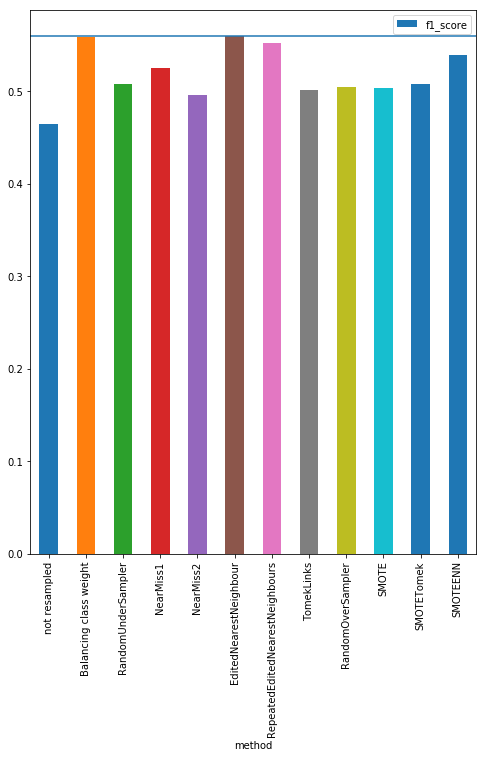

In [104]:
fig, ax = plt.subplots(figsize=(8,10))
resampled_score.plot(kind='bar', x='method', y='f1_score', ax=ax)
ax.axhline(resampled_score.f1_score.max())

According to the F1 Score of the classification model, the Edited Nearest Neighbour method to handle the class imbalance performed the best. So we will use ENN to handle class imbalance, then compare different models with each other.

In [105]:
#Preparing a dataframe for model analysis
#Data frame for evaluation metrics
enn_resampled_tuned_metrics = pd.DataFrame(index=['roc_auc', 'accuracy','precision','recall','f1'],columns=['LogisticReg','DecisionTree','GaussianNB','RandomForest','SVM'])

In [106]:
#Edited Nearest Neighbour
us = EditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = LogisticRegression(solver='lbfgs')
grid = {'C': 10.0 ** np.arange(-2,3)}

clf = GridSearchCV(clf_base, grid, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
enn_resampled_tuned_metrics.loc['accuracy','LogisticReg'] = accuracy
enn_resampled_tuned_metrics.loc['precision','LogisticReg'] = precision
enn_resampled_tuned_metrics.loc['recall','LogisticReg'] = recall
enn_resampled_tuned_metrics.loc['roc_auc','LogisticReg'] = roc_auc
enn_resampled_tuned_metrics.loc['f1','LogisticReg'] = f1score

# Print the tuned parameters and score
print('Tuned Logistic Regression with EditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 3670, 1: 2829})
Tuned Logistic Regression with EditedNearestNeighbours Parameters: {'C': 1.0}
Best score is 0.7237
AUC Score: 0.6935
Accuracy Score: 0.7231
Precision Score: 0.5067
Recall Score: 0.6257
f1 score: 0.5599


# ENN with Decision Tree Classifier

In [107]:
#Edited Nearest Neighbour
us = EditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = DecisionTreeClassifier()

# Setup the parameters and distributions to sample from: param_dist
param_grid = {"max_depth": range(1,10),
             'max_features': range(1,10)}

clf = RandomizedSearchCV(clf_base, param_grid, cv=5, n_iter=7, scoring='f1')

clf.fit(X_train_res, y_train_res)

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
enn_resampled_tuned_metrics.loc['accuracy','DecisionTree'] = accuracy
enn_resampled_tuned_metrics.loc['precision','DecisionTree'] = precision
enn_resampled_tuned_metrics.loc['recall','DecisionTree'] = recall
enn_resampled_tuned_metrics.loc['roc_auc','DecisionTree'] = roc_auc
enn_resampled_tuned_metrics.loc['f1','DecisionTree'] = f1score

# Print the tuned parameters and score
print('Tuned Decision Tree with EditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 3670, 1: 2829})
Tuned Decision Tree with EditedNearestNeighbours Parameters: {'max_features': 9, 'max_depth': 9}
Best score is 0.7035
AUC Score: 0.6612
Accuracy Score: 0.6871
Precision Score: 0.4577
Recall Score: 0.6018
f1 score: 0.5199


# ENN with GaussianNB

In [108]:
#Edited Nearest Neighbour
us = EditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = GaussianNB()

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'priors':[None]}

clf = GridSearchCV(clf_base, param_dist, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
enn_resampled_tuned_metrics.loc['accuracy','GaussianNB'] = accuracy
enn_resampled_tuned_metrics.loc['precision','GaussianNB'] = precision
enn_resampled_tuned_metrics.loc['recall','GaussianNB'] = recall
enn_resampled_tuned_metrics.loc['roc_auc','GaussianNB'] = roc_auc
enn_resampled_tuned_metrics.loc['f1','GaussianNB'] = f1score

# Print the tuned parameters and score
print('Tuned GaussianNB with EditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 3670, 1: 2829})
Tuned GaussianNB with EditedNearestNeighbours Parameters: {'priors': None}
Best score is 0.6928
AUC Score: 0.6758
Accuracy Score: 0.7084
Precision Score: 0.4857
Recall Score: 0.6010
f1 score: 0.5372


# ENN with Random Forest Classifier

In [109]:
#Edited Nearest Neighbour
us = EditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = RandomForestClassifier()

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'max_depth': range(1,10),
             'max_features': range(1,10),
             'n_estimators': [10,50,100,150,200,250,300,350,400,500]}

clf = RandomizedSearchCV(clf_base, param_dist, cv=5,n_jobs=8, scoring='f1')

clf.fit(X_train_res, y_train_res)

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
enn_resampled_tuned_metrics.loc['accuracy','RandomForest'] = accuracy
enn_resampled_tuned_metrics.loc['precision','RandomForest'] = precision
enn_resampled_tuned_metrics.loc['recall','RandomForest'] = recall
enn_resampled_tuned_metrics.loc['roc_auc','RandomForest'] = roc_auc
enn_resampled_tuned_metrics.loc['f1','RandomForest'] = f1score

# Print the tuned parameters and score
print('Tuned Random Forest with EditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 3670, 1: 2829})
Tuned Random Forest with EditedNearestNeighbours Parameters: {'n_estimators': 100, 'max_features': 6, 'max_depth': 9}
Best score is 0.7405
AUC Score: 0.7011
Accuracy Score: 0.7275
Precision Score: 0.5129
Recall Score: 0.6406
f1 score: 0.5696


# ENN with Support Vector Machine

In [110]:
#Edited Nearest Neighbour
us = EditedNearestNeighbours(random_state=0)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print('Distribution of class labels before resampling {}'.format(Counter(y_train)))
print('Distribution of class labels after resampling {}'.format(Counter(y_train_res)))

clf_base = svm.SVC(kernel='linear')

# Setup the parameters and distributions to sample from: param_dist
param_dist = {'C': [0.001,0.01,0.1,1], 'gamma': [0.001,0.01,0.1,1]}

clf = RandomizedSearchCV(clf_base, param_dist, cv=5, scoring='f1')

clf.fit(X_train_res, y_train_res)

#to store the predicted labels
y_pred_test = clf.predict(X_test)

#to calculate the auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
#calculate other metrics scores
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test,y_true=y_test)
f1score = f1_score(y_true=y_test, y_pred=y_pred_test)

#entering tuned metrics score to the dataframe
enn_resampled_tuned_metrics.loc['accuracy','SVM'] = accuracy
enn_resampled_tuned_metrics.loc['precision','SVM'] = precision
enn_resampled_tuned_metrics.loc['recall','SVM'] = recall
enn_resampled_tuned_metrics.loc['roc_auc','SVM'] = roc_auc
enn_resampled_tuned_metrics.loc['f1','SVM'] = f1score

# Print the tuned parameters and score
print('Tuned SVM with EditedNearestNeighbours Parameters: {}'.format(clf.best_params_))
print('Best score is {0:.4f}'.format(clf.best_score_))
print('AUC Score: {0:.4f}'.format(roc_auc))
print('Accuracy Score: {0:.4f}'.format(accuracy))
print('Precision Score: {0:.4f}'.format(precision))
print('Recall Score: {0:.4f}'.format(recall))
print('f1 score: {0:.4f}'.format(f1score))

Distribution of class labels before resampling Counter({0: 7220, 1: 2829})
Distribution of class labels after resampling Counter({0: 3670, 1: 2829})
Tuned SVM with EditedNearestNeighbours Parameters: {'gamma': 1, 'C': 1}
Best score is 0.7191
AUC Score: 0.6893
Accuracy Score: 0.7210
Precision Score: 0.5037
Recall Score: 0.6167
f1 score: 0.5545


In [111]:
100*enn_resampled_tuned_metrics

,LogisticReg,DecisionTree,GaussianNB,RandomForest,SVM
roc_auc,69.3475,66.1165,67.5777,70.1056,68.9263
accuracy,72.3073,68.7094,70.8449,72.7484,72.0984
precision,50.6676,45.768,48.5676,51.2871,50.3704
recall,62.5721,60.1814,60.0989,64.0561,61.6653
f1,55.9941,51.9943,53.7214,56.9648,55.4485


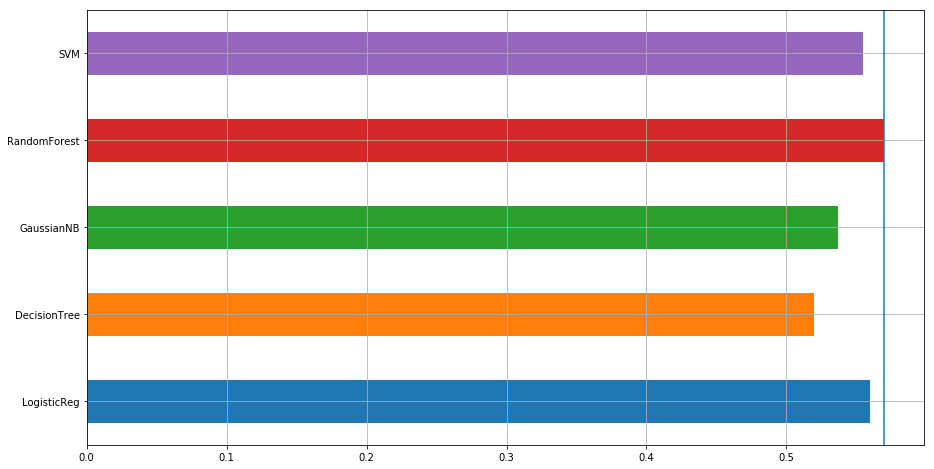

In [112]:
#plot a horizontal bar plot for the metrics of different classifier
fig, ax = plt.subplots(figsize=(15,8))
enn_resampled_tuned_metrics.loc['f1'].plot(kind='barh', ax=ax)
ax.axvline(max(enn_resampled_tuned_metrics.loc['f1']))
ax.grid()

Random Forest has the best f1 score compared to all other classification model, so I will choose Random Forest for this project. Since the F1-score is significantly better than a random classifier, I would recommend this Random Forest model to predict credit card default.